In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm\
from scipy.stats import pearsonr

#constant string value
SEPERATOR = "\n___________________________"

## Creating and Downsampling a Sine Wave using NumPy

In this section, we will explain the process of creating a sine wave using NumPy and then downsampling it.

### Step 1: Define Parameters

First, we define the parameters for the sine wave:
- `amplitude`: The amplitude of the sine wave.
- `frequency`: The frequency of the sine wave in Hertz.
- `phase`: The phase shift of the sine wave.
- `sampling_rate`: The number of samples per second.
- `duration`: The duration of the sine wave in seconds.

### Step 2: Create the Time Array

Using the `numpy.linspace` function, we create a time array that spans from 0 to the duration with the specified sampling rate.

### Step 3: Visualize the Sine Wave

Using `matplotlib`, we can plot the sine waves to visualize it.

### Step 4: Create a Validation

We print and run if statements on the min and max points of the waves to validage the data

In [152]:
# Parameters
frequency = 5
sampling_rate = 1000
duration = 2

# Time array
# endpoint ensures that 1 and -1 are included in the array
time = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Sine wave
# 2 * pi will make 1 in the linspace equal to 1 in the graph
sinWave = np.sin(2 * np.pi * frequency * time)

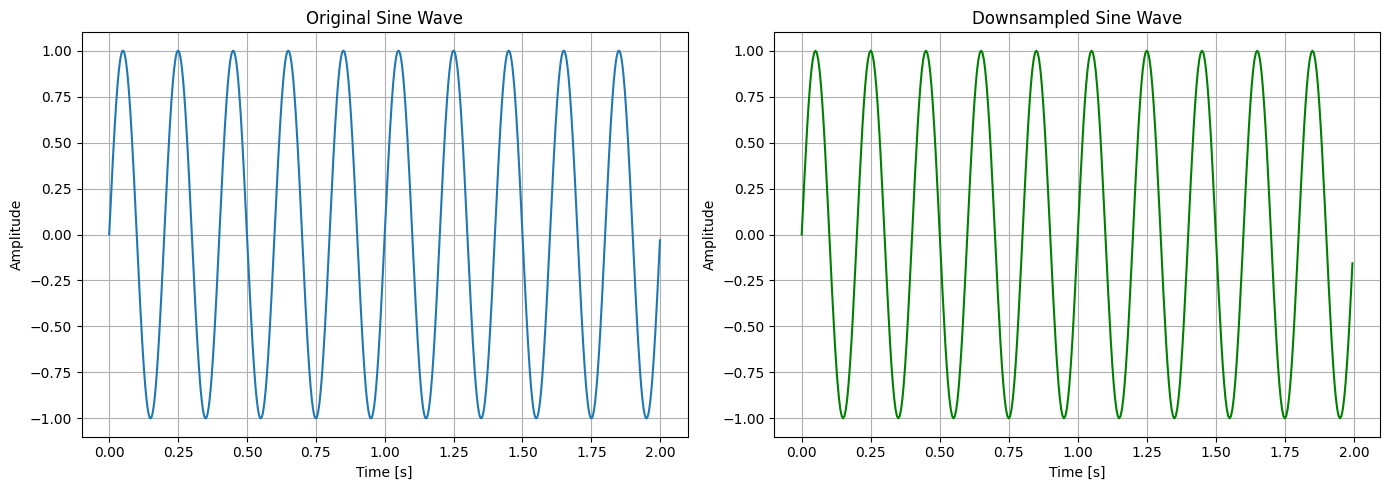

In [153]:
# Downsample the wave to 20 percent
downsample_factor = 5  # Since 20% is 1/5th of the original
timeDown = time[::downsample_factor]
sinWaveDown = sinWave[::downsample_factor]

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Original sine wave
axs[0].plot(time, sinWave)
axs[0].set_title('Original Sine Wave')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Amplitude')
axs[0].grid(True)

# Downsampled sine wave
axs[1].plot(timeDown, sinWaveDown, color='green')
axs[1].set_title('Downsampled Sine Wave')
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Amplitude')
axs[1].grid(True)

plt.tight_layout()
plt.show()


In [154]:
print("original min: ", min(sinWave))
print("downsampled min: ", min(y_downsampled))
print("original max: ", max(sinWave))
print("downsampled max: ", max(y_downsampled), SEPERATOR)

if max(y_downsampled) == max(sinWave) and min(y_downsampled) == min(sinWave):
    print("Downsampling successful! :)")

original min:  -1.0
downsampled min:  -1.0
original max:  1.0
downsampled max:  1.0 
___________________________
Downsampling successful! :)


## Laptop Price Exploration with Pandas

In this section, we will the use the Pandas library to explore the laptop prices dataset.

We will perform the following actions:
- Most expensive company
- Plotting prices of laptops
- See types of operating systems
- Plot prices per OS
- Analyze correlation between RAM and price
- Add a feature that stores the memory type

In [162]:
# Extracts the data from the csv file
df = pd.read_csv('laptop_price - dataset.csv')
# Gives the dimensions of the data (#rows, #columns)
print(df.shape, SEPERATOR)
# lists the columns of the data
print(df.columns, SEPERATOR)
# Gives a sample of the data
print(df.describe(), SEPERATOR)

(1275, 15) 
___________________________
Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object') 
___________________________
            Inches  CPU_Frequency (GHz)     RAM (GB)  Weight (kg)  \
count  1275.000000          1275.000000  1275.000000  1275.000000   
mean     15.022902             2.302980     8.440784     2.040525   
std       1.429470             0.503846     5.097809     0.669196   
min      10.100000             0.900000     2.000000     0.690000   
25%      14.000000             2.000000     4.000000     1.500000   
50%      15.600000             2.500000     8.000000     2.040000   
75%      15.600000             2.700000     8.000000     2.310000   
max      18.400000             3.600000    64.000000     4.700000   

       Price (Euro)  
count   1275.000000  
mean    1134.96905

In [161]:
print(df.head())

  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

  CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
0       Intel        Core i5                  2.3         8   
1       Intel        Core i5                  1.8         8   
2       Intel  Core i5 7200U                  2.5         8   
3       Intel        Core i7                  2.7        16   
4       Intel        Core i5                  3.1         8   

                Memory GPU_Company                GPU_Type  OpSys  \
0            128GB SSD       Intel  Iris Plus Graphics 640  macOS

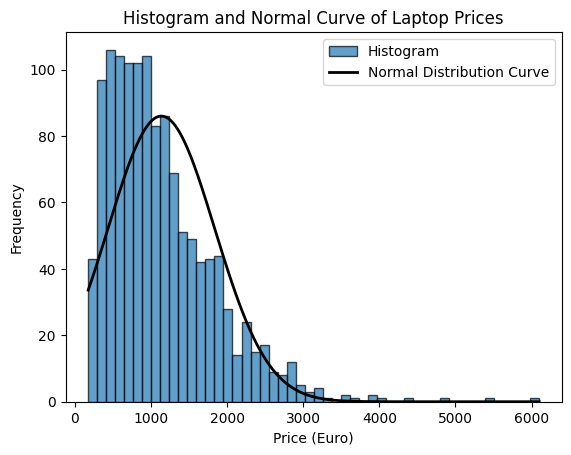

In [165]:
# Example Data
prices = sorted(list(df['Price (Euro)']))
meanPrice = df['Price (Euro)'].mean()
stdPrice = df['Price (Euro)'].std()

# Generate the histogram with original prices
counts, bins, _ = plt.hist(prices, bins=50, density=False, edgecolor='black', alpha=0.7, label='Histogram')

# Generate the curve using actual prices
x = np.linspace(min(prices), max(prices), 1000)  # Price range
y = norm.pdf(x, meanPrice, stdPrice) * (bins[1] - bins[0]) * len(prices)  # Scale the curve to match histogram

# Plot the curve
plt.plot(x, y, color='black', linewidth=2, label='Normal Distribution Curve')

# Titles and labels
plt.title('Histogram and Normal Curve of Laptop Prices')
plt.xlabel('Price (Euro)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

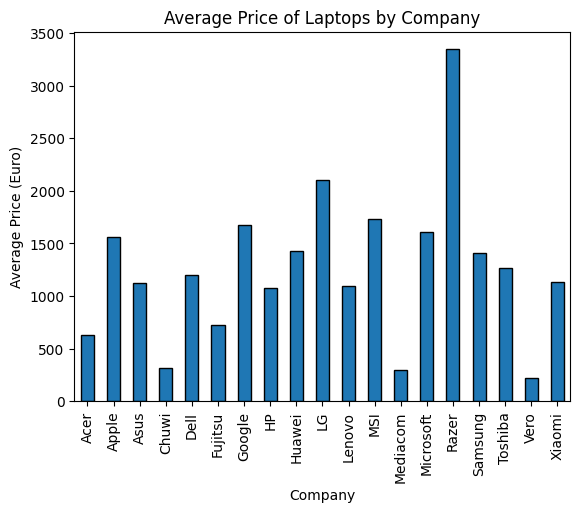

The most expensive company is:  Razer


In [180]:
df.groupby('Company')['Price (Euro)'].mean().plot(kind='bar', edgecolor='black', title='Average Price of Laptops by Company')
plt.ylabel('Average Price (Euro)')
plt.show()
print('The most expensive company is: ', df.groupby('Company')['Price (Euro)'].mean().idxmax())

In [173]:
unique_os_types = df['OpSys'].unique()
print(unique_os_types)
# Makes all windows versions the same
df['OpSys'] = df['OpSys'].apply(lambda x: 'Windows' if 'Windows' in x else x)
# Makes all mac versions the same
df['OpSys'] = df['OpSys'].apply(lambda x: 'Mac OS' if 'MAC' in x.upper() else x)
unique_os_types = df['OpSys'].unique()
print(unique_os_types)

['Mac OS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']
['Mac OS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


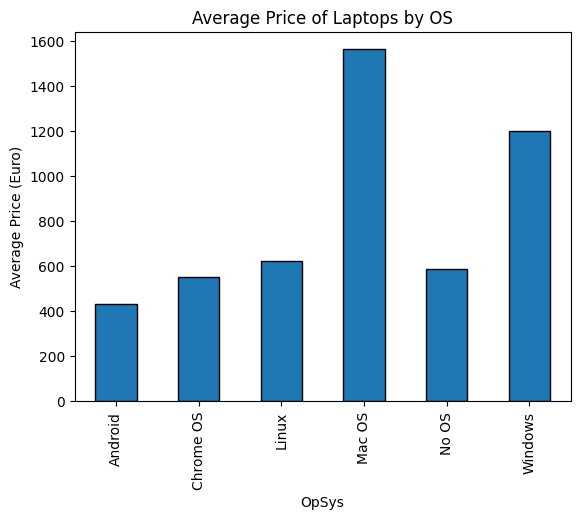

The most expensive OS is:  Mac OS


In [179]:
df.groupby('OpSys')['Price (Euro)'].mean().plot(kind='bar', edgecolor='black', title='Average Price of Laptops by OS')
plt.ylabel('Average Price (Euro)')
plt.show()
print('The most expensive OS is: ', df.groupby('OpSys')['Price (Euro)'].mean().idxmax())

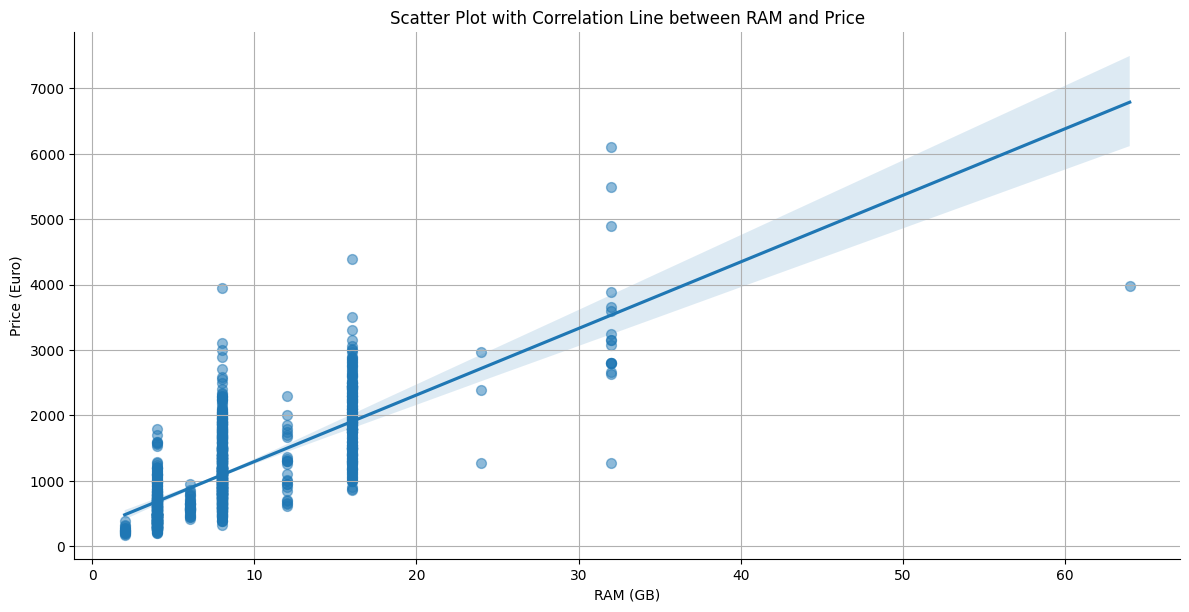

In [ ]:

# Calculate the Pearson correlation coefficient and p-value

r_value, p_value = pearsonr(df['RAM (GB)'], df['Price (Euro)'])
print(f"Pearson correlation coefficient (r): {r_value}")
print(f"Significance (p-value): {p_value}")
# Create a scatter plot with a correlation line
sns.lmplot(x='RAM (GB)', y='Price (Euro)', data=df, aspect=2, height=6, scatter_kws={'s': 50, 'alpha': 0.5})
plt.title('Scatter Plot with Correlation Line between RAM and Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.grid(True)
plt.show()